# `20240413a` Benchmarking un0, pic0, lit3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# lit3-32

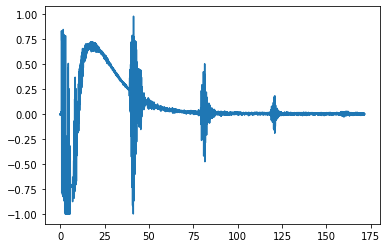

In [3]:
FILE = np.load("lit3-32/0_x_1_600_.npz")
tl = [x/47.75 for x in range(8192)]
lit3 = (FILE["signal"][0:8192] - 512)/512
plt.plot(tl,lit3)

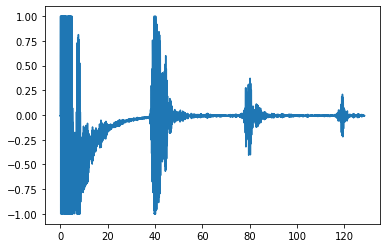

In [4]:
FILE = np.load("un0rick/300_HILO.npz")
tu = [x/63.75 for x in range(8192)]
un0 = FILE["signal"][0][0:8192]
plt.plot(tu,un0)

gain: 655


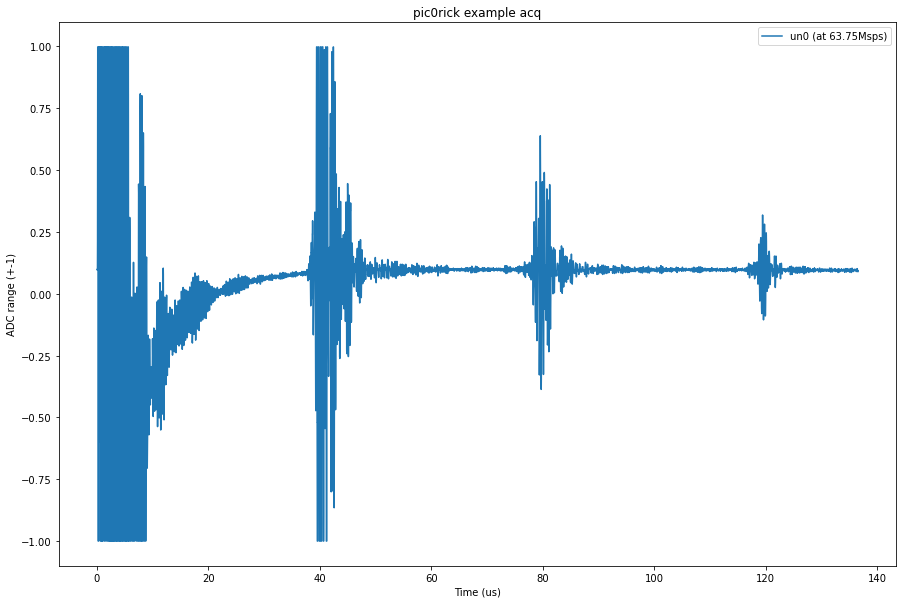

In [5]:
FILE = np.load("pic0rick/bench_8.npz")
tp = [x/60.0 for x in range(8192)]
pic0 = FILE["signal"][0:8192]
print("gain:",int(300+400*8/9))

ax = plt.figure(figsize=(15,10))
plt.plot(tp,pic0,label="un0 (at 63.75Msps)")
plt.legend()

plt.title("pic0rick example acq")
plt.xlabel("Time (us)")
plt.ylabel("ADC range (+-1)")
plt.savefig("pic0.png")


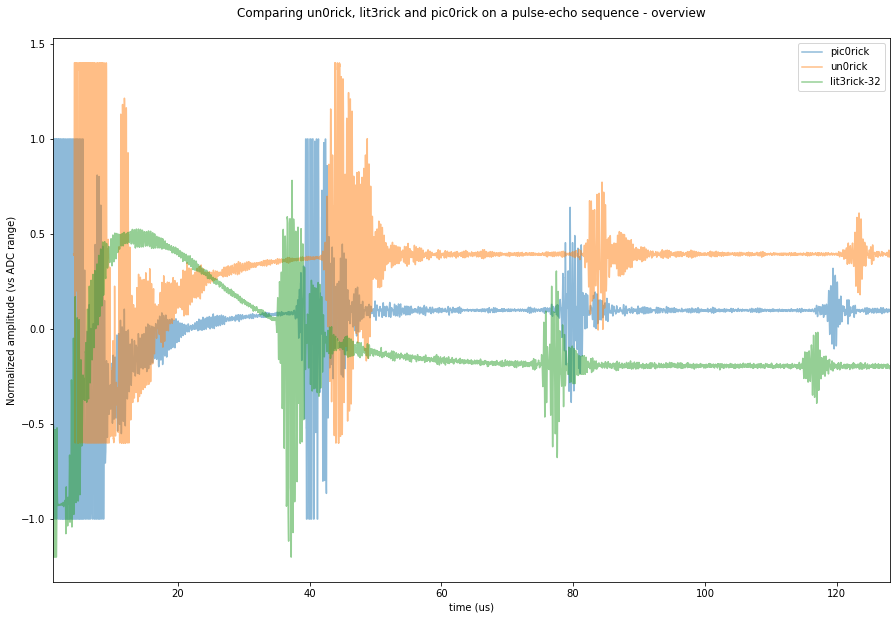

In [17]:
ax = plt.figure(figsize=(15,10))
offset = 4
plt.plot(tp,pic0,label="pic0rick",alpha=0.5)
plt.plot([x+0.2+offset for x in tu],[x+0.4 for x in un0],label="un0rick",alpha=0.5)
plt.plot([x-offset for x in tl],[x-0.2 for x in lit3],label="lit3rick-32",alpha=0.5)
plt.xlim(1,128)
plt.xlabel("time (us)")
plt.ylabel("Normalized amplitude (vs ADC range)")
plt.title("Comparing un0rick, lit3rick and pic0rick on a pulse-echo sequence - overview\n")
plt.legend()
plt.savefig("signals.png")

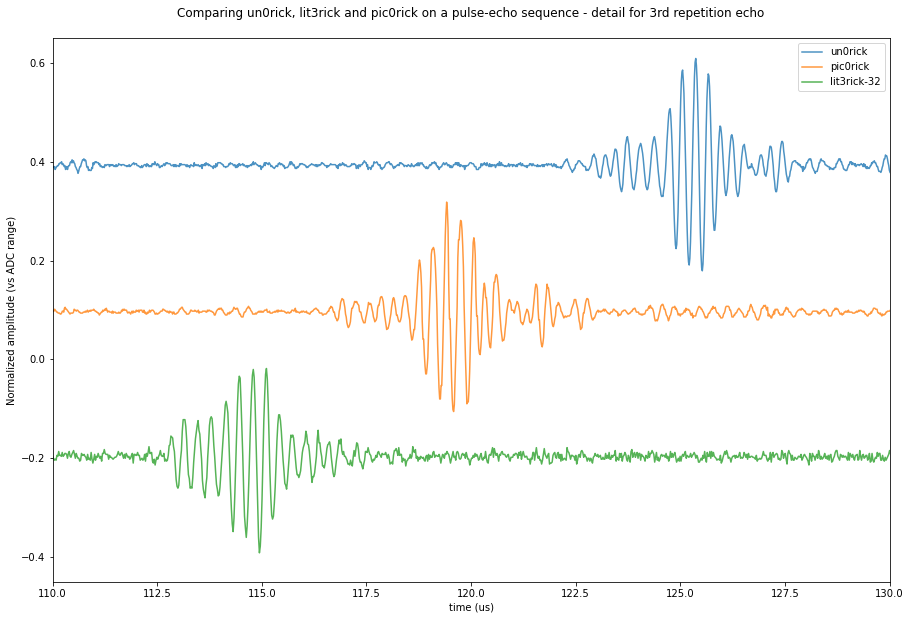

In [16]:
ax = plt.figure(figsize=(15,10))
offset = 4
plt.plot([x+0.2+1.5*offset for x in tu],[x+0.4 for x in un0],label="un0rick",alpha=0.8)
plt.plot(tp,pic0,label="pic0rick",alpha=0.8)
plt.plot([x-1.5*offset for x in tl],[x-0.2 for x in lit3],label="lit3rick-32",alpha=0.8)
plt.xlim(110,130)
plt.ylim(-0.45,0.65)
plt.xlabel("time (us)")
plt.ylabel("Normalized amplitude (vs ADC range)")
plt.title("Comparing un0rick, lit3rick and pic0rick on a pulse-echo sequence - detail for 3rd repetition echo\n")
plt.legend()
plt.savefig("echo3.png")

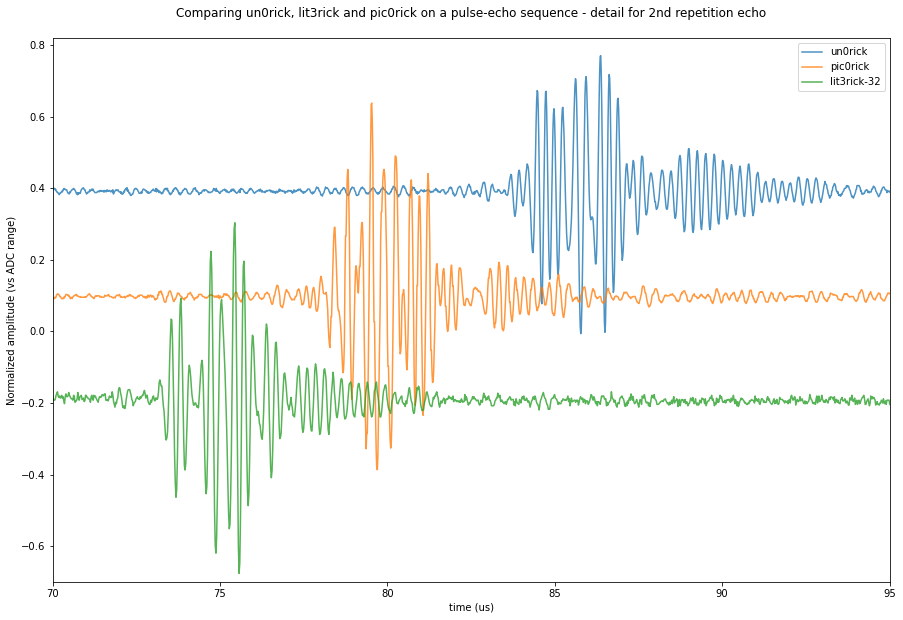

In [18]:
ax = plt.figure(figsize=(15,10))
offset = 4
plt.plot([x+0.2+1.5*offset for x in tu],[x+0.4 for x in un0],label="un0rick",alpha=0.8)
plt.plot(tp,pic0,label="pic0rick",alpha=0.8)
plt.plot([x-1.5*offset for x in tl],[x-0.2 for x in lit3],label="lit3rick-32",alpha=0.8)
plt.xlim(70,95)
plt.ylim(-0.7,0.82)
plt.xlabel("time (us)")
plt.ylabel("Normalized amplitude (vs ADC range)")
plt.title("Comparing un0rick, lit3rick and pic0rick on a pulse-echo sequence - detail for 2nd repetition echo\n")
plt.legend()
plt.savefig("echo2.png")

# Ajustement des frequences

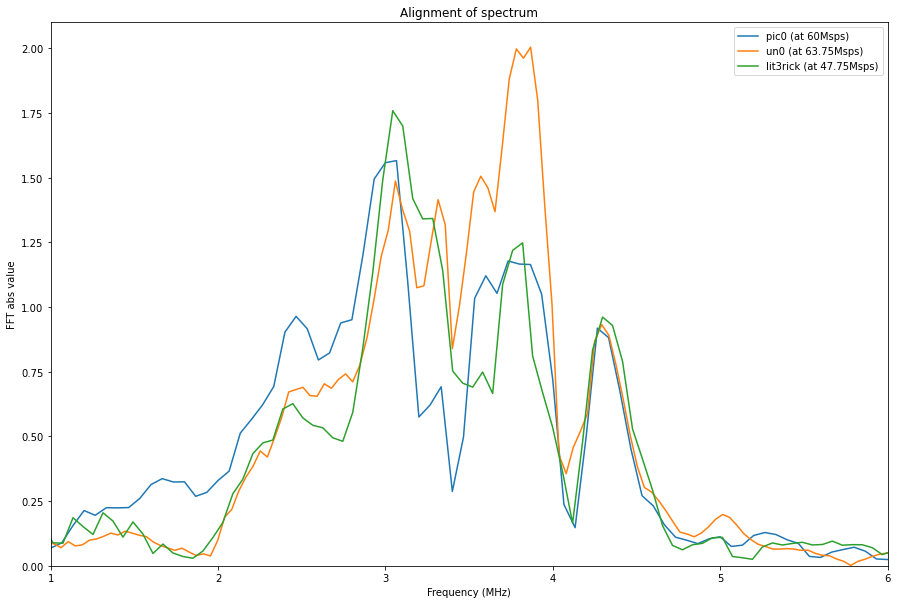

In [22]:
su = un0[2000:3500]
sp = pic0[2200:3100]
sl = lit3[1700:2500]
ax = plt.figure(figsize=(15,10))

fl = [x*47.75/len(sl) for x in range(len(sl))]
fu = [x*63.75/len(su) for x in range(len(su))]
fp = [x*60.0/len(sp) for x in range(len(sp))]

plt.plot(fp,np.abs(np.fft.fft(sp))/40,label="pic0 (at 60Msps)")
plt.plot(fu,np.abs(np.fft.fft(su))/37,label="un0 (at 63.75Msps)")
plt.plot(fl,np.abs(np.fft.fft(sl))/25,label="lit3rick (at 47.75Msps)" )
plt.legend()
plt.xlim(1,6)
plt.ylim(0,2.1)
plt.title("Alignment of spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("FFT abs value")
plt.savefig("Spectrum.png")